In [279]:
# Social media assignment 1 #qanon network analysis
# Jesmer Logtenberg (s4124820) and Michiel Pronk (s3737101)

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx_viewer import Viewer
from nltk.tokenize import TweetTokenizer
import numpy as np
import seaborn as sns

In [280]:
# Load edges
df = pd.read_csv('edges_qanon.csv', sep=';')
df.rename(columns=df.iloc[0], inplace=True)
df.drop(df.index[0], inplace=True)

In [281]:
# Load vertices
df_v = pd.read_csv('vertices_qanon.csv', sep=';')
df_v = df_v.drop(256)
df_v.rename(columns=df_v.iloc[0], inplace=True)
df_v.drop(df_v.index[0], inplace=True)

df_v = df_v.dropna(subset=['Vertex'])

In [282]:
# Create graph
G = nx.Graph()
for i in range(len(df)):
    G.add_edge(df.iloc[i]['Vertex 1'], df.iloc[i]['Vertex 2'])

In [283]:
# Degree values
degree = list(nx.degree_centrality(G).values())

# Closeness values
closeness = list(nx.closeness_centrality(G).values())

# Betweenness values
betweenness = list(nx.betweenness_centrality(G).values())

In [284]:
# Initialize values Graph 1 (normal graph)

# Node colors
node_colors = []
for i in range(563):
    if degree[i] > 0.03 and betweenness[i] > 0.01:
        node_colors.append('red')
    elif degree[i] > 0.03:
        node_colors.append('orange')
    elif closeness[i] > 0.02:
        node_colors.append('green')
    else:
        node_colors.append('blue')

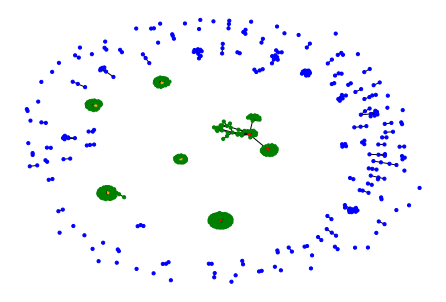

In [285]:
# Draw Graph 1 (normal graph)
nx.draw(G, node_size=10, node_color=node_colors)

In [286]:
# Initialize values Graph 2 (circular graph)

# Node colors
node_colors = []
for i in range(563):
    if degree[i] > 0.03 and betweenness[i] > 0.01:
        node_colors.append('red')
    elif degree[i] > 0.03:
        node_colors.append('orange')
    elif closeness[i] > 0.02:
        node_colors.append('green')
    else:
        node_colors.append('blue')
        
# Node sizes
node_sizes = []
for amount in df_v['Followers']:
    if int(amount) > 1000000:
        node_sizes.append(40)
    elif int(amount) > 100000:
        node_sizes.append(20)
    else: 
        node_sizes.append(5)

# Edge colors
edge_colors = []
for type in df['Relationship']:
    if type == 'Mentions':
        edge_colors.append('gray')
    elif type == 'Replies to':
        edge_colors.append('purple')
    elif type == 'Tweet':
        edge_colors.append('yellow')

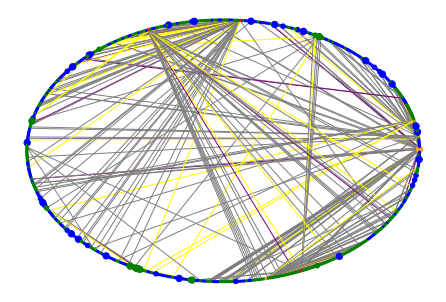

In [287]:
# Draw Graph 2 (circular graph)
nx.draw_circular(G, node_size=node_sizes, node_color=node_colors, edge_color=edge_colors)

In [288]:
# Count number of I, we, you words and calculate linguistic status
tweet_dict = {}
for i in range(1,len(df)):
    name = df.loc[i, 'Vertex 1']
    tweet = df.loc[i, 'Tweet']
    tweet_dict[name] = tweet_dict.get(name,'') + tweet

tkn = TweetTokenizer()
i_words = ['i', 'me', 'my', 'mine', 'myself']
we_words = ['we', 'us', 'our', 'ours', 'ourselves']
you_words = ['you', 'your', 'your', 'yourself', 'yourselves']
counter_dict = {}
for user in tweet_dict:
    i, we, you, total = 0,0,0,0
    for token in tkn.tokenize(tweet_dict[user].lower()):
        if token in i_words:
            i += 1
        elif token in we_words:
            we += 1
        elif token in you_words:
            you += 1
        total += 1
    total_pronouns = i + we + you
    if total_pronouns == 0:
        linguistic_status = 0
    else:
        linguistic_status = (i/total_pronouns)*0.1*(i/total) + (we/total_pronouns)*(we/total) + (you/total_pronouns)*(you/total)
    counter_dict[user] = [i, we, you, i/total, we/total, you/total, linguistic_status]



In [289]:
# Calculate load centrality
load = nx.load_centrality(G)

In [290]:
# Degree values
degree = nx.degree_centrality(G)

# Closeness values
closeness = nx.closeness_centrality(G)

# Betweenness values
betweenness = nx.betweenness_centrality(G)
    

In [291]:
# Sort highest to lowest
dict(sorted(counter_dict.items(), key=lambda kv:(kv[1][-1], kv[1][2], kv[1][-3]), reverse=True))

{'rayn3ll': [0, 0, 1, 0.0, 0.0, 0.1111111111111111, 0.1111111111111111],
 'emanuelvincent8': [0, 0, 2, 0.0, 0.0, 0.1, 0.1],
 'jnaneswari1': [0, 0, 5, 0.0, 0.0, 0.09803921568627451, 0.09803921568627451],
 'shufixer': [0, 2, 0, 0.0, 0.09090909090909091, 0.0, 0.09090909090909091],
 'impeachb4unity': [0,
  0,
  2,
  0.0,
  0.0,
  0.07407407407407407,
  0.07407407407407407],
 'desantisstan': [0, 0, 5, 0.0, 0.0, 0.06578947368421052, 0.06578947368421052],
 'm___0_o': [1,
  0,
  2,
  0.045454545454545456,
  0.0,
  0.09090909090909091,
  0.062121212121212126],
 'zeropartysystem': [1, 0, 1, 0.1, 0.0, 0.1, 0.05500000000000001],
 'chemicaleyeguy': [0,
  1,
  0,
  0.0,
  0.045454545454545456,
  0.0,
  0.045454545454545456],
 'steffanwatkins': [0,
  0,
  2,
  0.0,
  0.0,
  0.044444444444444446,
  0.044444444444444446],
 'jackhammer29006': [0,
  0,
  2,
  0.0,
  0.0,
  0.041666666666666664,
  0.041666666666666664],
 'mariellorichard': [0,
  0,
  2,
  0.0,
  0.0,
  0.041666666666666664,
  0.0416666666

In [292]:
# Centrality scores of rayn3ll
print('Load {0}'.format(load['rayn3ll']))
print('Degree {0}'.format(degree['rayn3ll']))
print('Betweenness {0}'.format(betweenness['rayn3ll']))
print('Closeness {0}'.format(closeness['rayn3ll']))

Load 0.0
Degree 0.0035587188612099642
Betweenness 0.0
Closeness 0.0


In [293]:
# Sort lowest to highest
dict(sorted(counter_dict.items(), key=lambda item: item[1][-1]))

{'basile061': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'kiermunn': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'helloeurope62': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'fartvader4': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'honeywellcom': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'chrvm19': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'changnoi2018': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'rouzysc': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'cjmu': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'lismtal7234': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'richspence10': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'enothewonderdog': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'lyyved': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'kellyreynoldskd': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'mricallball': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'corgiboys': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'loverofbooks123': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'paulat1962': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'cynicalvision50': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'sasmeijer': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'judithdoetmaar': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'ss5726': [0, 0, 0, 0.0, 0.0, 0.0, 0],
 'clarkturrent': [0, 0

In [294]:
# Centrality scores of basile061
print('Load {0}'.format(load['basile061']))
print('Degree {0}'.format(degree['basile061']))
print('Betweenness {0}'.format(betweenness['basile061']))
print('Closeness {0}'.format(closeness['basile061']))

Load 0.0
Degree 0.0035587188612099642
Betweenness 0.0
Closeness 0.02139275315431899


In [295]:
# Delete user who do not post from the closeness, load, betweenness and degree dictionaries
vertex2 = []
for name in closeness:
    if name not in counter_dict:
        vertex2.append(name)
for name in vertex2:
    del closeness[name]
    del load[name]
    del betweenness[name]
    del degree[name]

In [296]:
# Add centrality to indivudual lists
load_list, degree_list, betweenness_list, closeness_list, status_list = [],[],[],[],[]
for user in counter_dict:
    load_list.append(load[user])
    degree_list.append(degree[user])
    closeness_list.append(closeness[user])
    betweenness_list.append(betweenness[user])
    status_list.append(counter_dict[user][-1])

In [297]:
# Correlation linguistic status and load
np.corrcoef(status_list, load_list)

array([[ 1.        , -0.00470474],
       [-0.00470474,  1.        ]])

In [298]:
# Correlation linguistic status and degree
np.corrcoef(status_list, degree_list)

array([[1.        , 0.01509488],
       [0.01509488, 1.        ]])

In [299]:
# Correlation linguistic status and closeness
np.corrcoef(status_list, closeness_list)

array([[ 1.        , -0.18586376],
       [-0.18586376,  1.        ]])

In [300]:
# Correlation linguistic status and betweenness
np.corrcoef(status_list, betweenness_list)

array([[ 1.        , -0.00474242],
       [-0.00474242,  1.        ]])

In [301]:
# Create new dataframe to draw correlation plots
data = {'Linguistic Status':  status_list,
        'Closeness': closeness_list,
        'Betweenness': betweenness_list,
        'Load': load_list,
        'Degree': degree_list
        }

new_df = pd.DataFrame (data, columns = ['Linguistic Status', 'Closeness','Betweenness','Load','Degree'])

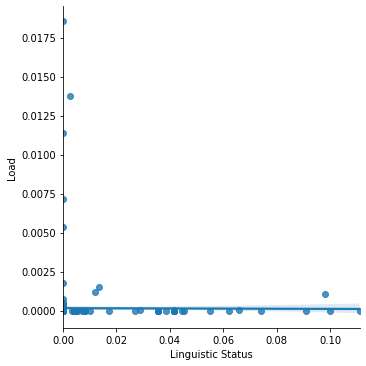

In [302]:
# Visualized correlation of linguistic status and load
sns.lmplot(x='Linguistic Status', y='Load', data=new_df)

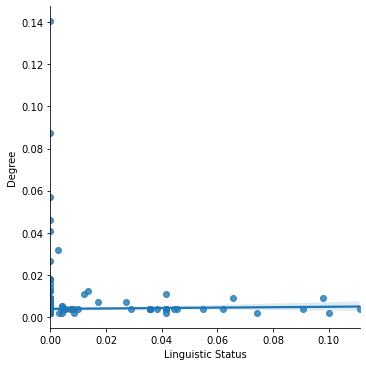

In [303]:
# Visualized correlation of linguistic status and degree
sns.lmplot(x='Linguistic Status', y='Degree', data=new_df)

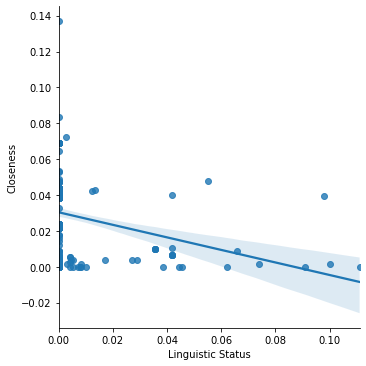

In [304]:
# Visualized correlation of linguistic status and closeness
sns.lmplot(x='Linguistic Status', y='Closeness', data=new_df)

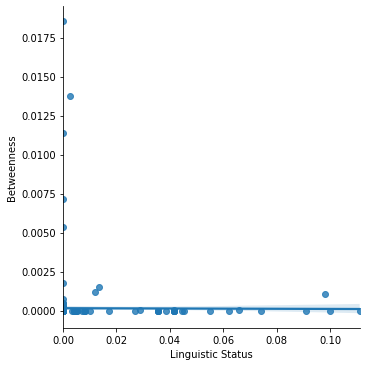

In [305]:
# Visualized correlation of linguistic status and betweenness
sns.lmplot(x='Linguistic Status', y='Betweenness', data=new_df)